In [3]:
!pip install deepface


  Obtaining dependency information for deepface from https://files.pythonhosted.org/packages/b6/74/6ccbe3c60fc0fed434c0a5dec7b605b17c7dfc7108168bc44820574a98a0/deepface-0.0.84-py3-none-any.whl.metadata
  Using cached mtcnn-0.1.1-py3-none-any.whl (2.3 MB)
  Obtaining dependency information for retina-face>=0.0.1 from https://files.pythonhosted.org/packages/2e/37/4de95e94ff48d557dab7b4f086f143b65eca6a1ef8fe466055421a85a7d2/retina_face-0.0.14-py3-none-any.whl.metadata
  Using cached fire-0.5.0-py2.py3-none-any.whl
  Obtaining dependency information for gunicorn>=20.1.0 from https://files.pythonhosted.org/packages/0e/2a/c3a878eccb100ccddf45c50b6b8db8cf3301a6adede6e31d48e8531cab13/gunicorn-21.2.0-py3-none-any.whl.metadata
Using cached deepface-0.0.84-py3-none-any.whl (87 kB)
Using cached gunicorn-21.2.0-py3-none-any.whl (80 kB)
Using cached retina_face-0.0.14-py3-none-any.whl (23 kB)


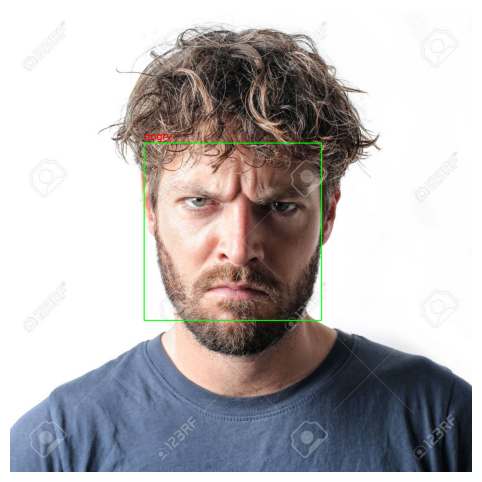

Emotion: angry (94.01%)


In [6]:

import cv2
from matplotlib import pyplot as plt
from deepface import DeepFace

# Load the pre-trained Haar Cascade model for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load an image from disk
image_path = "C:\\Users\\serge\\Pictures\\44126476-angry-man-s-portrait.jpg"  # Update this to the path of your image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

if len(faces) == 0:
    print("No faces detected in the image.")
else:
    # Initialize a list to store detected emotions and confidences
    detected_emotions = []

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform emotion analysis using DeepFace
    detected_faces = DeepFace.analyze(image_path, actions=['emotion'])

    # Extract emotions and confidences for each detected face
    for i, (x, y, w, h) in enumerate(faces):
        emotion_dict = detected_faces[i]['emotion']
        detected_emotions.append(emotion_dict)

    # Find the emotion with the highest confidence
    highest_confidence_index = detected_emotions.index(max(detected_emotions, key=lambda x: x['happy']))
    highest_confidence_emotion = max(detected_emotions[highest_confidence_index], key=detected_emotions[highest_confidence_index].get)
    
    # Draw a bounding box around the face with the highest confidence
    (x, y, w, h) = faces[highest_confidence_index]
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display only the emotion with the highest confidence
    cv2.putText(image, highest_confidence_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the resulting image
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Print the emotion with the highest confidence
    highest_confidence = detected_emotions[highest_confidence_index][highest_confidence_emotion]
    print(f"Emotion: {highest_confidence_emotion} ({highest_confidence:.2f}%)")


